# Results

In [24]:
import json
from pandas import DataFrame

def readData(dataPath, figureTitle, isSave=False, fileName=""):
    jsonData = json.load(open(dataPath, encoding="utf8"))
    # jsonData.pop()
    otherProfileCount = -1
    dataToDF = []

    for data in jsonData:
        otherProfileCount = otherProfileCount + 1
        count = 0
        summ = 0

        if otherProfileCount > 0:
            for reading in data["readings"]:
                count = count + 1
                summ = summ + reading

            time = summ / count / 1000000

            dataToDF.append({'time': time, 'otherProfileCount': otherProfileCount})
            print(f"Text search in {data['print name']} with search string {data['search string']} took an average of {time} seconds")
    
    df = DataFrame(dataToDF)
    plot = df.plot(x="otherProfileCount", y="time", title=figureTitle, legend=False, ylabel="Time in seconds", xlabel="Other Profile Count", marker="o")
    if isSave:
        plot.get_figure().savefig(fileName)

## Text Search

Text search in Search with 1 Facebook and 1 Instagram with search string hvordan går det took an average of 0.10498683333333333 seconds
Text search in Search with 1 Facebook and 2 Instagram with search string hvordan går det took an average of 0.1103962 seconds
Text search in Search with 1 Facebook and 3 Instagram with search string hvordan går det took an average of 0.1302017 seconds


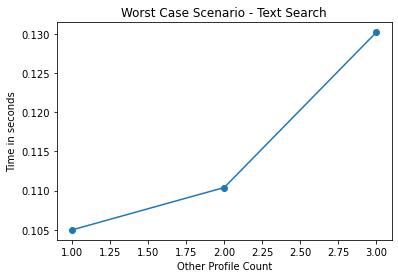

In [25]:
readData("text_search_performance.json", "Worst Case Scenario - Text Search", isSave=False, fileName="Text Search Run Time.jpg")

## Image Search

Text search in 1 Instagram 1 Facebook with search string basenji took an average of 0.014197714285714286 seconds
Text search in 1 Instagram 2 Facebook with search string basenji took an average of 0.016552285714285714 seconds
Text search in 1 Instagram 3 Facebook with search string basenji took an average of 0.019768571428571427 seconds


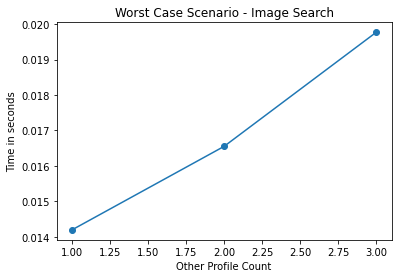

In [26]:
readData("image_search_performance.json", "Worst Case Scenario - Image Search", isSave=False, fileName="Image Search Run Time.jpg")